In [1]:
# Purpose of Study: Comparison of anti-cancer skin treatment Capomulin versus other skin cancer treatment performed on 
#                   249 mice.
#                   A 45 days study that observed and measured scc tumor growths in mice to determine the efficacy of
#                   Capomulin compared to other treatment regimens.
#
# Summary of Study Results: Provide a summary of observations and insights using tables and figures to present the 
#                  study results. Look across all previously generated figures and tables and write at least 
#                  three observations or inferences that can be made from the data. Include these observation
#                  at the top of notebook:
# Observation 1.) Bar plots and Pie charts show total number of mice for each treatment(10) were evenly distributed
#                 amongst the sexes. Therefore, the study results are not bias to any particular sex.
# Observation 2.) Mouse C326 using Infubinol regimen had one outlier compared to the other three promising drug treatments.
# Observation 3.) Capomulin line plot for Mouse S185 shows the Tumor Volume decreases with time.
# Observation 4.) Capomulin scatter plot shows a reduction of mouse weight as tumor volume decreases.
# Observation 5.) Fnally, linear regression line shows a positive relationship (independent and dependentht variables go up)
#                 between tumor volume and weight using Capomulin drug regimen. Thereby confirming (along with the line
#                 and scatter plots) the Capomulin is the most promising anti-cancer skin treatment compared to the others
#                 based on using mice for testing. 

In [2]:
# Interactive charting with %matplotlib notebook wasn't include because we will be creating multiple plots in a 
# single notebook without turning off interactive window.

# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

In [3]:
# 1. Check the data for any mouse ID with duplicate timepoints and remove any data associated with that mouse ID.

# df = pd.read_csv(os.path.join("Resources", "Mouse_metadata.csv"))
# df.duplicated()
# study_resultsedit = df.drop_duplicates()
# pd.set_option('display.max_rows', None)

df = pd.read_csv(os.path.join("Resources", "Study_results.csv"))
study_resultsedit = df.drop_duplicates()
df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# (1.Continued) Merging two relational data sets 
# Load from Resource folder and Read CSV files with mouse metada and study results (split into 2 files) 
# test with df.head and df.describe to make sure data loading properly
# file_to_load = "Resources/Mouse_metadata.csv"
# file_to_load_two = "Resources/Study_results.csv"
# df = pd.read_csv(file_to_load)
# df = pd.read_csv(file_to_load_two)
# combine data sets into a single data set using merge function

mouse_metadata_one = pd.read_csv(os.path.join("Resources", "Mouse_metadata.csv"))
# study_resultsedit = df.drop_duplicates()

combine_mouse_study = pd.merge(mouse_metadata_one, study_resultsedit, on="Mouse ID")
# combine_mouse_study
combine_mouse_study.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# 2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the 
#    tumor volume for each drug regimen.
#    Use Pandas groupby.agg() function on a groupby - using combine_mouse_study which is the merge dataset

# df = combine_mouse_study
# df.aggregate(["mean", "median", "var", "std"]), these two df statements will be for each column alone.
# combine_mouse_study.groupby("Drug Regimen", as_index=False).agg({"Age_months": [np.mean, np.median, np.var, np.std],})
# combine_mouse_study.groupby("Drug Regimen", as_index=False).agg({"Age_months": "median"})


df = combine_mouse_study.copy()
print("Tumor Volume Summary Statistics")

df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])


Tumor Volume Summary Statistics


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Total Mice for each Drug')

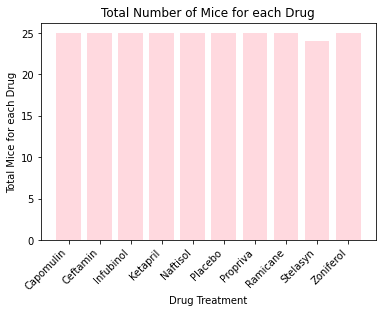

In [6]:
# 3. Create a bar plot using Matplotlib's pyplot that shows the number of total mice for each treatment regimen
#    throughout the course of study.

x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", \
          "Stelasyn", "Zoniferol"]
dfplot = df.groupby("Drug Regimen").nunique()["Mouse ID"]
plt.bar(x_axis, dfplot, color="pink", alpha=0.6)
plt.title("Total Number of Mice for each Drug")
plt.xticks(x_axis, rotation=45, ha ="right")
plt.xlabel("Drug Treatment")
plt.ylabel("Total Mice for each Drug")

Text(0, 0.5, 'Total Mice for each Drug')

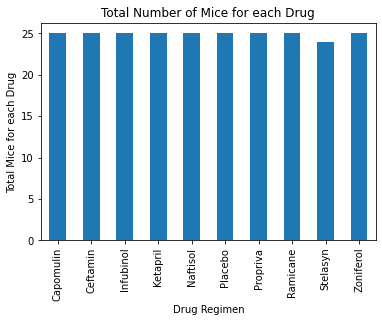

In [7]:
# 3B. Create a bar plot using both Panda's DataFrame.plot() that shows the number of total mice for each 
#     treatment regimen throughout the course of study

# df = combine_mouse_study.copy()
dfplot.plot.bar()
plt.title("Total Number of Mice for each Drug")
plt.ylabel("Total Mice for each Drug")

([<matplotlib.patches.Wedge at 0x20cfc38c1c8>,
 [Text(-0.006939175976765929, -1.0999781124353174, 'Female'),
  Text(0.008516261426031077, 1.3499731379887985, 'Male')],
 [Text(-0.003785005078235961, -0.5999880613283548, '49.799%'),
  Text(0.005362090527501048, 0.849983086881836, '50.201%')])

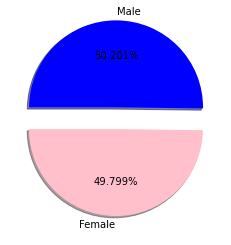

In [8]:
# 4A. Generate a pie plot using Matplotlib's pyplot that shows the distribution of female and male mice in the study.

# mouse_metadata_one = pd.read_csv(os.path.join("Resources", "Mouse_metadata.csv"))
dfsexcount = mouse_metadata_one.groupby("Sex")["Mouse ID"].count()
dfsexcount

#labels for the sections of pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = [dfsexcount[0], dfsexcount[1]]
# The colors of each section of the pie chart
colors = ["pink", "blue"]
# Tells matplotlib to separate the "Male" section from the others
explode = [0, 0.25]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.3f%%", shadow=True, startangle=180)


<AxesSubplot:title={'center':'Sex Distribution in Study'}, ylabel='Mouse ID'>

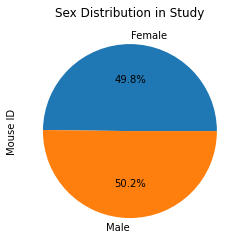

In [9]:
# 4B. Generate a pie plot using Panda's DataFrame.plot() that shows the distribution of female or male mice in the study.

# dfsexcount = mouse_metadata_one.groupby("Sex")["Mouse ID"].count()

dfsexcount.plot.pie(title="Sex Distribution in Study", autopct='%1.1f%%')


In [10]:
# 5. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#    Capomulin, Ramicane, Infubinol, and Ceftamin. 
#    Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across
#    all four treatment regimens.

def getquartilesIQR(Drug_Regimen):
    treatments = df.loc[df["Drug Regimen"] == Drug_Regimen]\
                .sort_values(["Mouse ID", "Timepoint"], ascending=False)\
                .drop_duplicates("Mouse ID") 
    
# tested the script above to determine if it will do as expected:   
# treatments = df.loc[df["Drug Regimen"] == "Capomulin"]\
#             .sort_values(["Mouse ID", "Timepoint"], ascending=False)\
#             .drop_duplicates("Mouse ID") 
# treatments

    quantiles = treatments["Tumor Volume (mm3)"].quantile([0.25, 0.75])

    IQR = quantiles[0.75] - quantiles[0.25]

    lower_bound = round(quantiles[0.25] - (1.5*IQR), 2) 
    upper_bound = round(quantiles[0.75] + (1.5*IQR), 2)
    print(Drug_Regimen)
    print(f"First and Third Quartile are {quantiles[0.25]} and {quantiles[0.75]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outliers = treatments.loc[(treatments["Tumor Volume (mm3)"] < lower_bound) | (treatments["Tumor Volume (mm3)"] 
                > upper_bound)]
    print(outliers)
# create space between each treatment regimen
    print("\n\n")
    
getquartilesIQR("Capomulin")
getquartilesIQR("Ramicane")
getquartilesIQR("Infubinol")
getquartilesIQR("Ceftamin")


Capomulin
First and Third Quartile are 32.37735684 and 40.1592203
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []



Ramicane
First and Third Quartile are 31.56046955 and 40.65900627
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []



Infubinol
First and Third Quartile are 54.04860769 and 65.52574285
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  



Ceftamin
First and Third Quartile are 48.72207785 and 64

Text(0, 0.5, 'Final Tumor Volume')

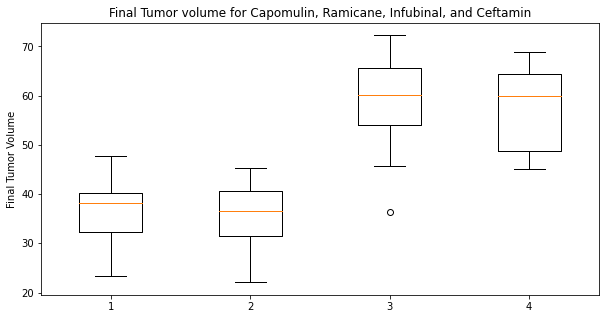

In [12]:
# 6. Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
#    and highlight any potential outliers in the plot by changing their color and style.


def boxplot(Drug_Regimens):
    data = []    
    for regimens in Drug_Regimens:
        
        treatments = df.loc[df["Drug Regimen"] == regimens]\
                    .sort_values(["Mouse ID", "Timepoint"], ascending=False)\
                    .drop_duplicates("Mouse ID") 
        data.append(treatments["Tumor Volume (mm3)"])
# Create boxplot
    plt.boxplot(data)

# Set the size of the plot (width, height) 
plt.figure(figsize=(10,5))
boxplot(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Set title/labels
plt.title("Final Tumor volume for Capomulin, Ramicane, Infubinal, and Ceftamin")
plt.ylabel("Final Tumor Volume")



s185


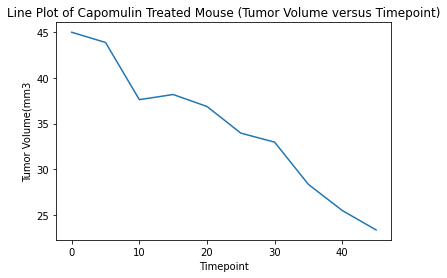

In [11]:
# 7. Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. timepoint for that mouse.

capomulinmouse = combine_mouse_study[combine_mouse_study["Drug Regimen"]=="Capomulin"]["Mouse ID"].iloc[0]
df_mouse = combine_mouse_study[combine_mouse_study["Mouse ID"]==capomulinmouse] 
print(capomulinmouse)


plt.title("Line Plot of Capomulin Treated Mouse (Tumor Volume versus Timepoint)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3")
plt.plot(df_mouse["Timepoint"], df_mouse["Tumor Volume (mm3)"])  
plt.show()


Capomulin Scatter Plot of Mouse Weight versus Average Tumor Volume


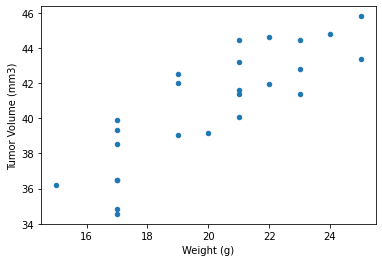

In [13]:
# 8. Generate a scatter plot of mouse weight versus average tumor volume over time for the Capomulin treatment regimen.

capomulinmouse = combine_mouse_study[combine_mouse_study["Drug Regimen"]=="Capomulin"]\
                 .groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

capomulinmouse.plot.scatter("Weight (g)","Tumor Volume (mm3)")
print("Capomulin Scatter Plot of Mouse Weight versus Average Tumor Volume")

The correlation coefficient between mouse weight and average tumor volume is 0.84
The correlation p-val between mouse weight and average tumor volume is 1.3225722434712645e-07


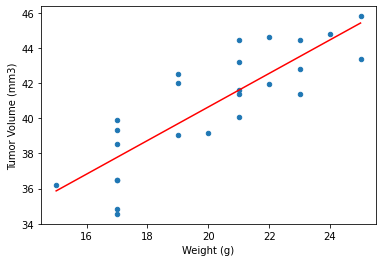

In [14]:
# 9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume
#    for the Capomulin treatment.
#    Plot the linear regression model on top of the previous scatter plot
#    using import scipy.stats as st module

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = \
        st.linregress(capomulinmouse["Weight (g)"], capomulinmouse["Tumor Volume (mm3)"])
                     
# Plot scatter plot
capomulinmouse.plot.scatter("Weight (g)","Tumor Volume (mm3)")
                       
# Plot Regression line
x_values = np.linspace(15, 25, 10) 
regress_values = slope * x_values + intercept
plt.plot(x_values, regress_values, "r-")                      
                        
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(rvalue, 2)}")
print(f"The correlation p-val between mouse weight and average tumor volume is {pvalue}") 

# Show plot
plt.show()                      
                       